In [301]:
from qiskit import *
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
simulator = AerSimulator()

import numpy as np
import math
import random

from sympy import Matrix
from sympy.physics.quantum import TensorProduct

import matplotlib.pyplot as plt

In [302]:
Q0 = np.array([[1],[0]])
Q1 = np.array([[0],[1]])

H = 1/np.sqrt(2) * np.array([[1,1],
                          [1,-1]])

In [303]:
# Gives the n fold tensor of a matrix M with iteslf
def nFoldTensor(n,M):
    NewM = M
    
    for i in range(n-1):
        NewM = TensorProduct(NewM,M)
        
    return NewM

# Next step in the diffusion opperator
def diffusion(n):
    matrix = -1*np.identity(2**n)
    matrix[0][0] = 1
    
    return matrix

In [317]:
# Input number of qubits and the number of shots

def Grover(n,s):
    # Select a random number to generate the oracle
    Goal = random.randrange(2**n)

    #=============================================================#
    # U_o is the oracle needed for Grover's Algorithm
    U_o = np.identity(2**n)
    U_o[Goal][Goal] = -1

    # U_s is the diffusion operator
    U_s = nFoldTensor(n,H)@diffusion(n)@nFoldTensor(n,H)

    #=============================================================#
    # Generate the Grover gate which is repeated n times
    Grover = U_o @ U_s
    GroverGate = UnitaryGate(Grover, label='$G$')

    #=============================================================#
    qc = QuantumCircuit(n)
    
    # Add the Hadamard Gate to get uniform quantum position
    for i in range(n):
        qc.h(i)
    
    # Add the Grover Gate to have high odds of getting it right
    for i in range(n):
        qc.append(GroverGate,range(n))

    # Final Measurement
    qc.measure_all()
    #=============================================================#
    # Running the simulation locally
    qc_aer = transpile(qc,backend=simulator)

    # Number of shots on the simulation
    shots = s
    result = simulator.run(qc_aer, shots=shots).result()
    
    #=============================================================#
    # Collecting the data, x is the numbers between 0 and n-1, 
    # y is the probability of each number being the correct one.
    x = []
    y = []

    for i in range(2**n):
        x.append(i)
    
        try:
            y.append(result.data(qc)['counts'][hex(i)]/shots)
        except:
            y.append(0)
    
    
    #=============================================================#
    # Output the Goal and what you got
    # return Goal, y.index(max(y))
    
    # Output a bar graph of the results of all shots
    # return plt.bar(x,y)
    
    # Output a drawing of the quantum circuit
    return qc.draw(output='mpl')

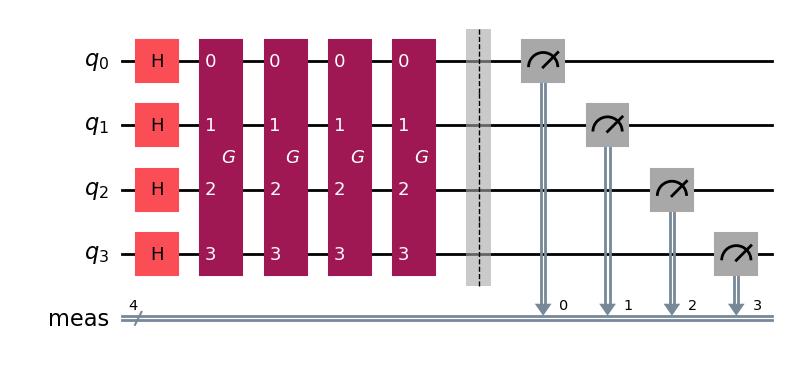

In [318]:
Grover(4,100)

In [ ]:
def AmpAmp(size, state):
    